# Income Classification Using LightGBM and Scikit-learn


### Task 1: Import Libraries

In [1]:
import  numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


### Task 2: Load the Adult Census Dataset 

In [8]:
df = pd.read_csv ('usercode/data.csv')
df.head (5)
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Sex             32561 non-null  object
 9   Capital Gain    32561 non-null  int64 
 10  Capital Loss    32561 non-null  int64 
 11  Hours per week  32561 non-null  int64 
 12  Country         31978 non-null  object
 13  Income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [14]:
df.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Income            0
dtype: int64

In [12]:
df.isnull().sum()
df.isna().sum()
df.fillna ('Unknown', inplace= True)
df.describe ()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
df.head (5)

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


### Task 3: Perform Exploratory Data Analysis

In [17]:
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours per week', 'Country', 'Income'],
      dtype='object')

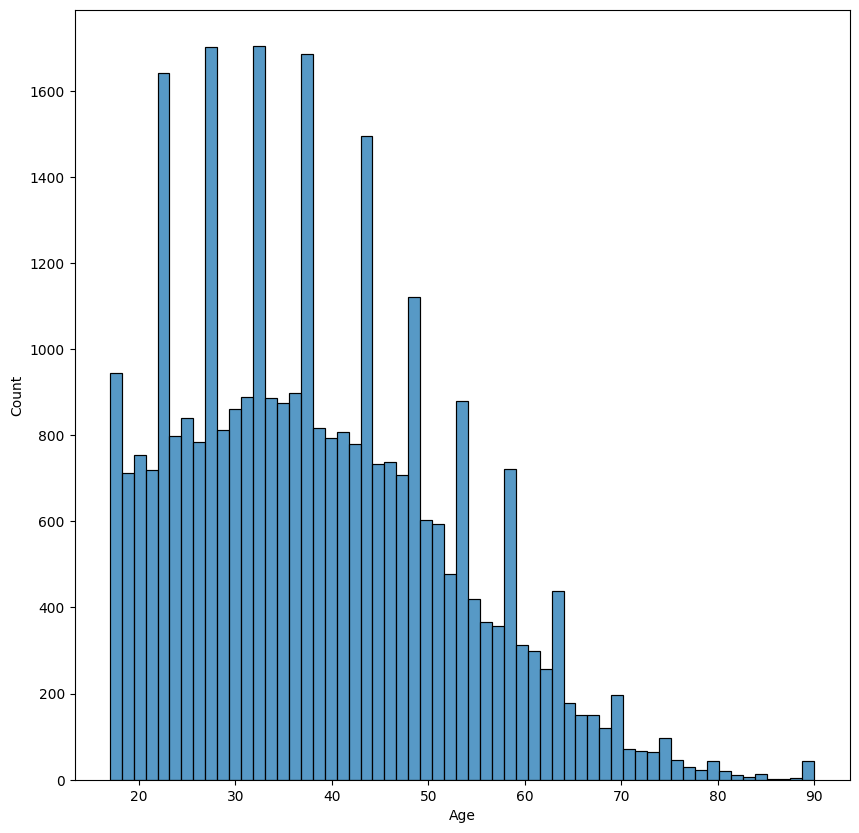

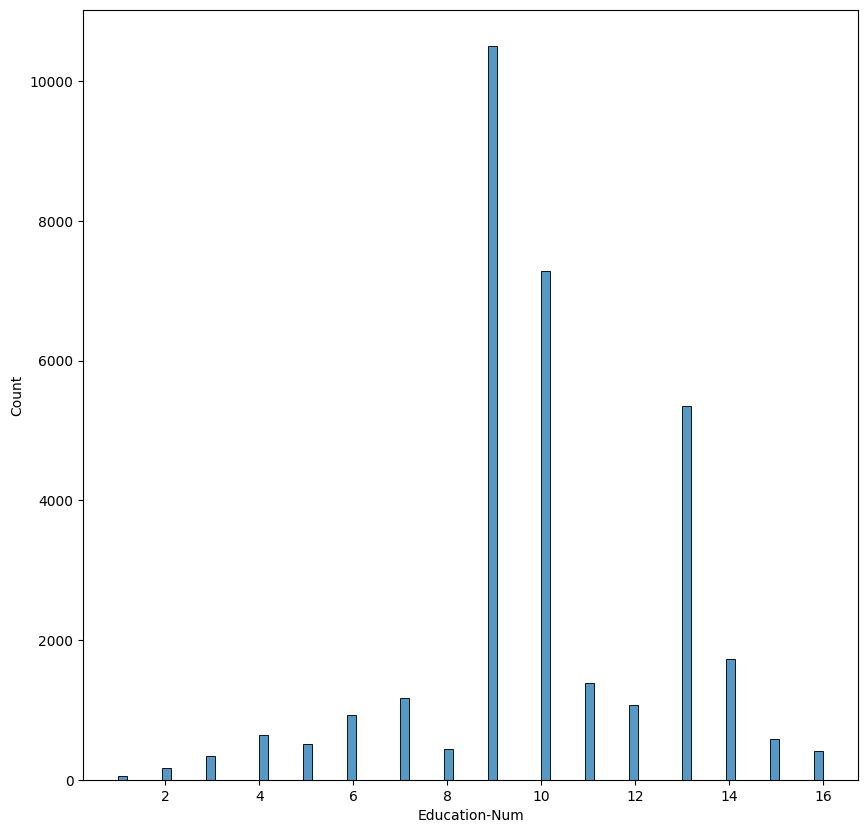

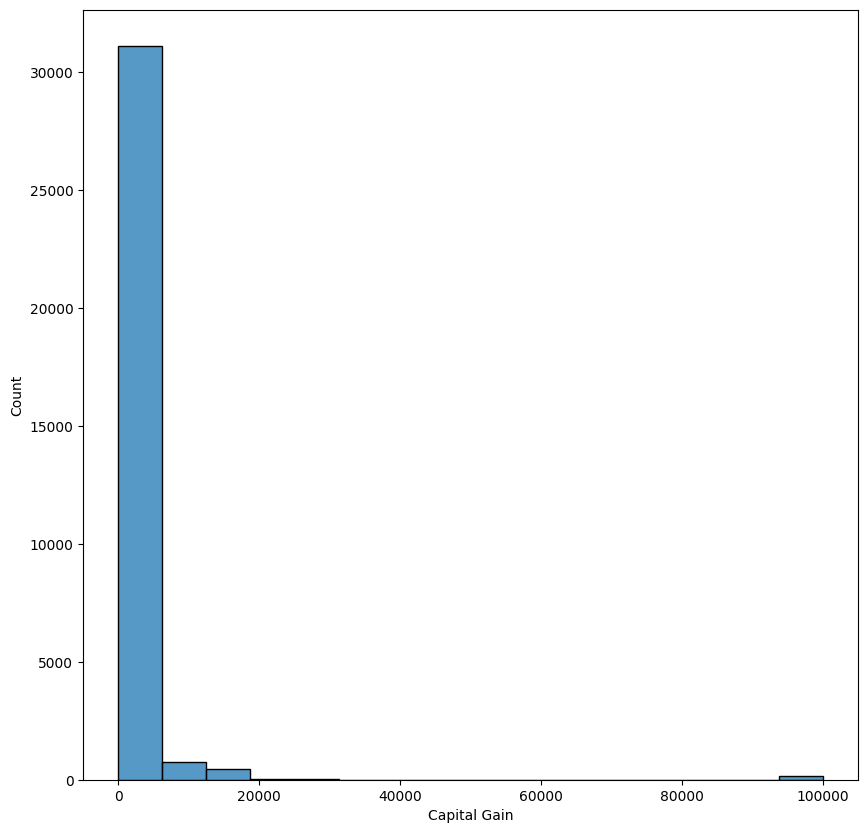

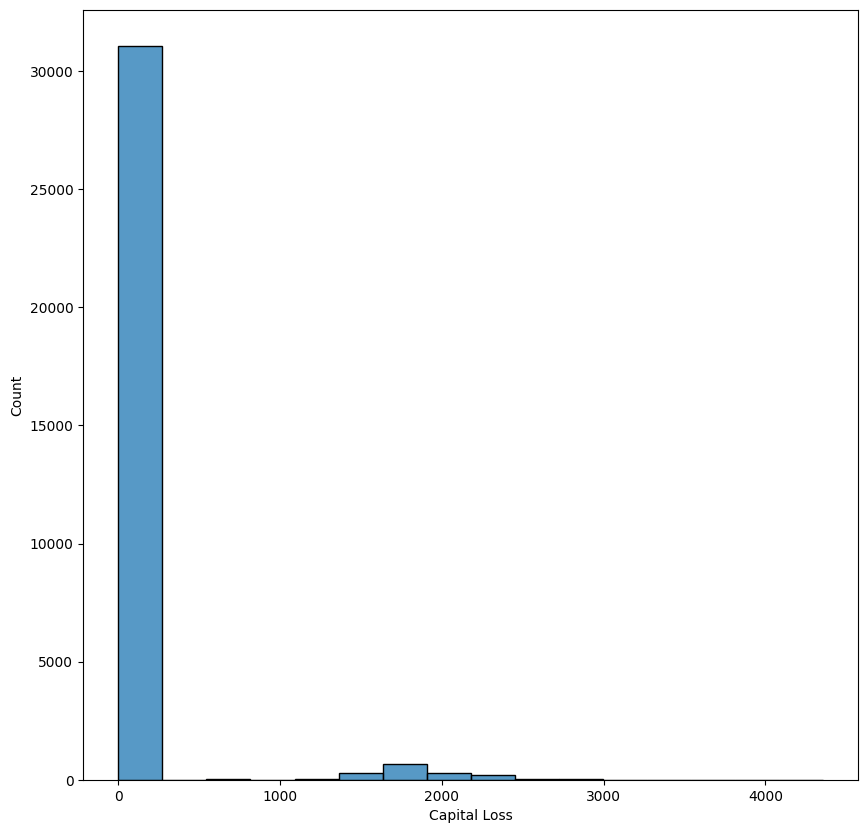

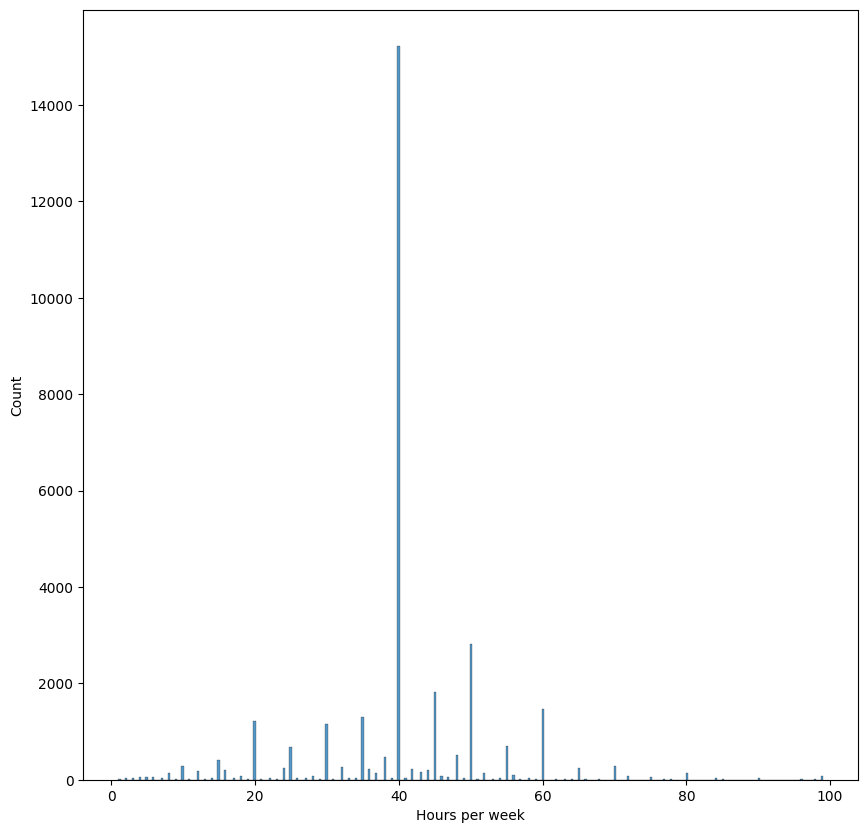

In [19]:
numerical_features = ['Age', 'Education-Num',
       'Capital Gain',
       'Capital Loss', 'Hours per week']

for feature in numerical_features:
       plt.figure (figsize= (10,10))
       sns.histplot (df[feature])
       plt.show()

/tmp/ipykernel_196/4042768916.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


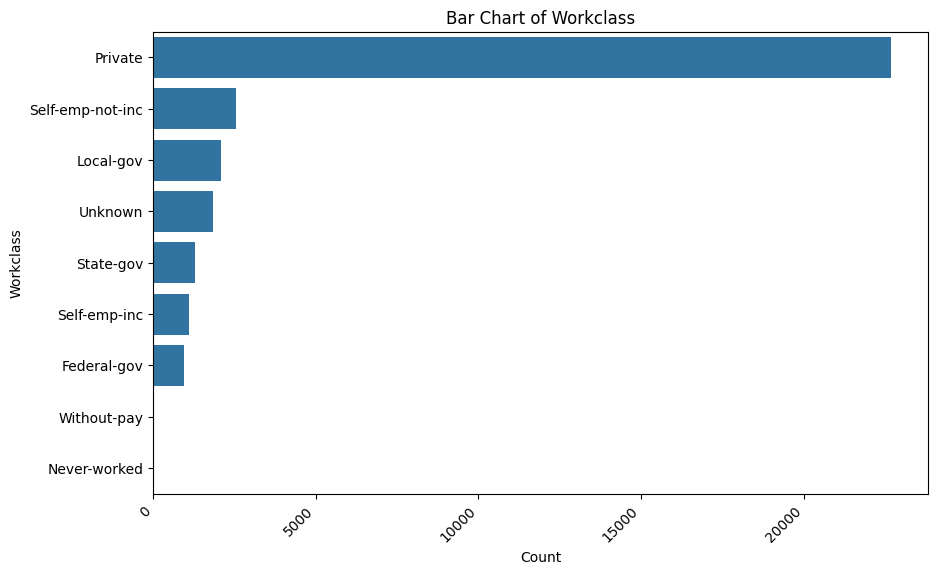

/tmp/ipykernel_196/4042768916.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


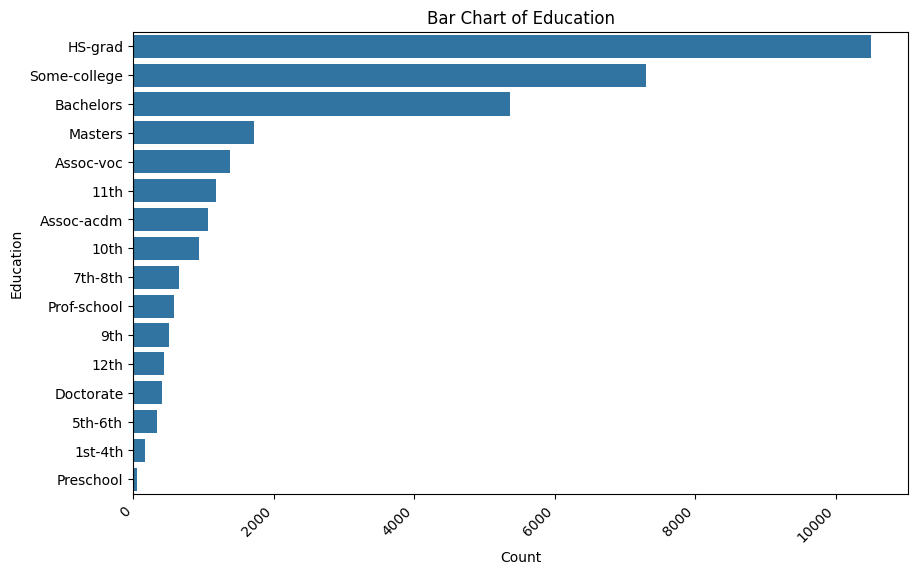

/tmp/ipykernel_196/4042768916.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


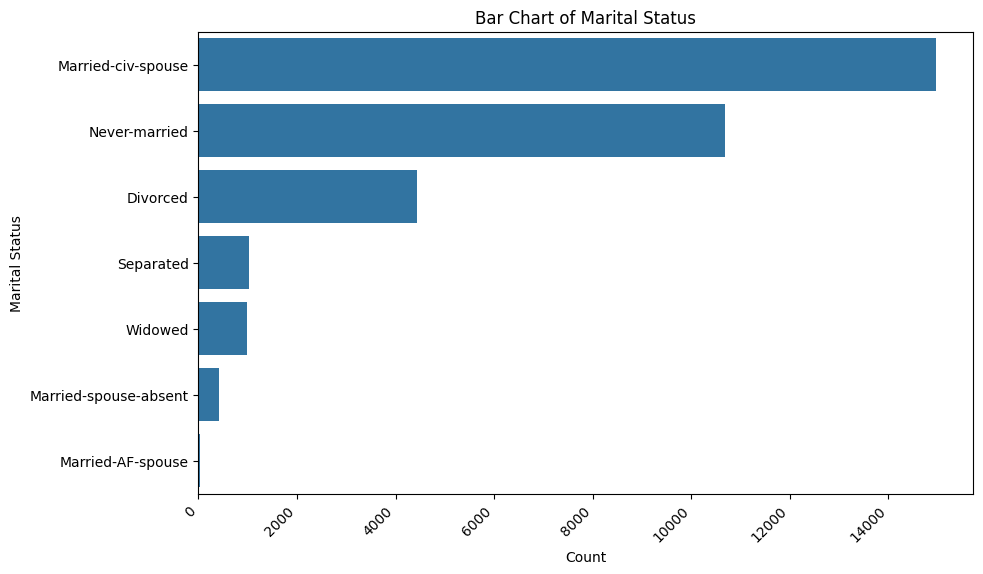

/tmp/ipykernel_196/4042768916.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


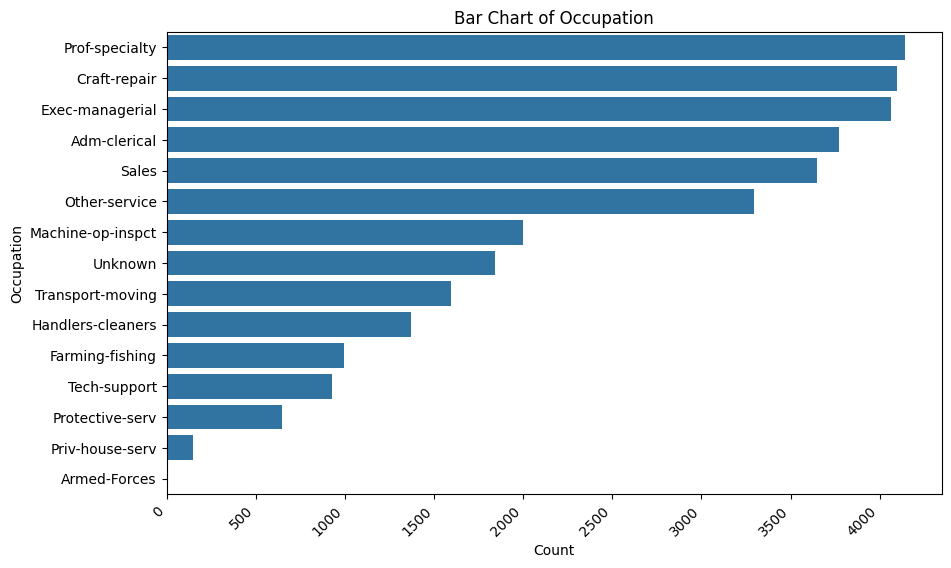

/tmp/ipykernel_196/4042768916.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


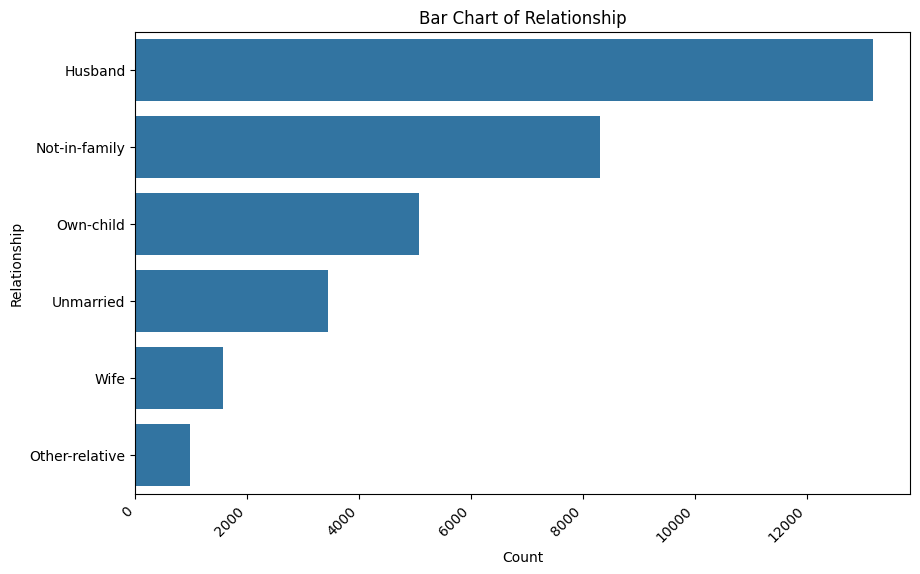

/tmp/ipykernel_196/4042768916.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


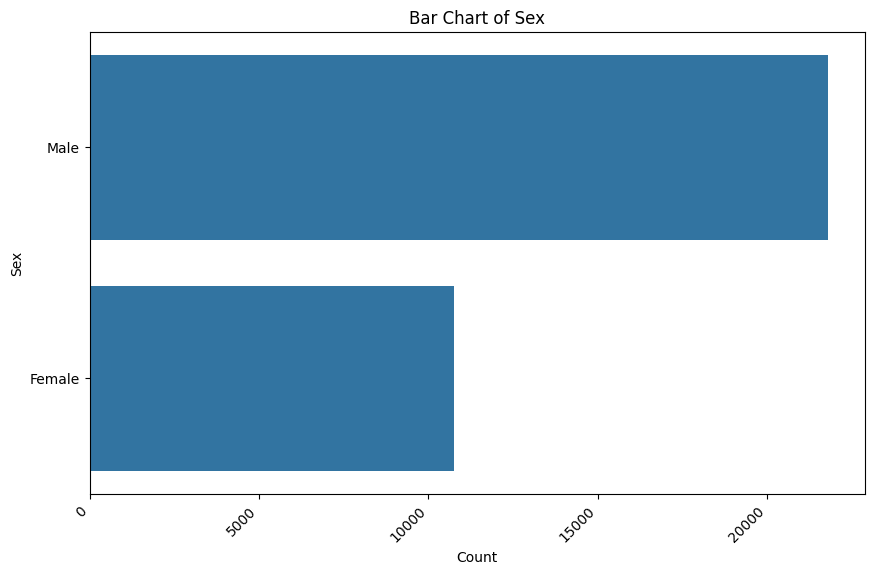

/tmp/ipykernel_196/4042768916.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


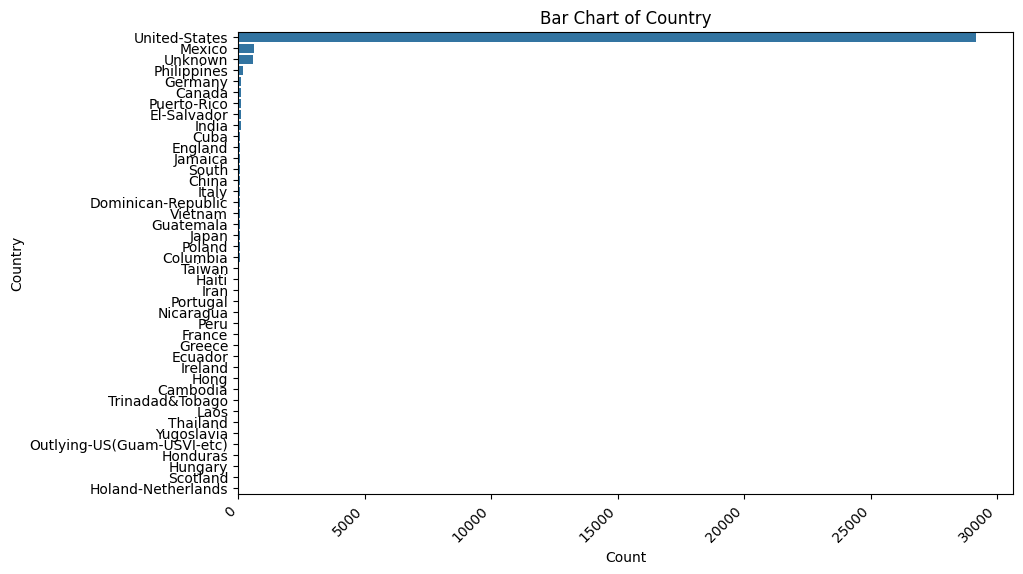

In [20]:
categorical_features = ["Workclass", "Education", "Marital Status", "Occupation", "Relationship", "Sex", "Country"]

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    chart = sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    # If the labels are too cluttered, you can rotate them
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

### Task 4: Encode Categorical Features and Target

In [21]:
X = df.drop  (columns= ['Income'])
y = df ['Income']

In [23]:
X_categorical = X [categorical_features]
X_numeric = X [numerical_features]

In [25]:
from sklearn.preprocessing import  OneHotEncoder

encoder = OneHotEncoder(min_frequency=0.03, sparse_output=False, drop='first')
encoder.set_output(transform='pandas')

OneHotEncoder(drop='first', min_frequency=0.03, sparse_output=False)

In [26]:
encoder.fit (X_categorical)
encoded = encoder.transform (X_categorical)

In [29]:
X = pd.concat ([X_numeric, encoded], axis=1)

In [30]:
y = y.replace({'<=50K': 0, '>50K': 1})
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

### Task 5: Split Data into Train and Test Sets

In [32]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Task 6: Define a LightGBM Model 

In [34]:
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=42, verbose = -1)

In [35]:
model. fit (X_train,y_train)

LGBMClassifier(random_state=42, verbose=-1)

In [36]:
y_pred = model.predict (X_test)

### Task 7: Evaluate Baseline Model

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.87      0.88      0.88      6513



In [40]:
print (confusion_matrix (y_test, y_pred))

[[4662  280]
 [ 510 1061]]


In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score (y_test,y_pred)
print(f'AUC: {round(roc_auc_score(y_test, y_pred), 4)}')

AUC: 0.8094


In [43]:
def evaluate_model(y_test, y_pred):
   print('Classification Report')
   print(classification_report(y_test, y_pred))

   print('Confusion Matrix')
   print(confusion_matrix(y_test, y_pred))

   print(f'AUC: {round(roc_auc_score(y_test, y_pred), 4)}')

evaluate_model(y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.87      0.88      0.88      6513

Confusion Matrix
[[4662  280]
 [ 510 1061]]
AUC: 0.8094


### Task 8: Perform k-Fold Cross-Validation  

In [45]:
from sklearn.model_selection import cross_val_score
k = 5

# Run cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='roc_auc')

print('Baseline model mean CV score: {:.4f}'.format(cv_scores.mean()))

Baseline model mean CV score: 0.9266


### Task 9: Define Parameters for Hyperparameter Tuning

In [54]:
import scipy as sp 
from scipy.stats import randint

# Define the parameters distribution
param_dist = {
   'num_leaves': [30, 45,60],
   'min_child_samples': [100, 200,300],
   'max_depth': [2, 10,20],
}

### Task 10: Use RandomSearchCV to Tune Hyperparameters 

In [56]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 20

# Create a randomized search class instance
random_search = RandomizedSearchCV(
    estimator=model, param_distributions=param_dist,
    n_iter=n_iter_search, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3, random_state=42
)

# Execute the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.910 total time=   0.2s
[CV 2/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.915 total time=   0.2s
[CV 3/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.913 total time=   0.2s
[CV 4/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.911 total time=   0.2s
[CV 5/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.916 total time=   0.2s
[CV 1/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.918 total time=   0.4s
[CV 2/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.926 total time=   0.4s
[CV 3/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.926 total time=   0.4s
[CV 4/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.927 total time=   0.4s
[CV 5/5] END max_depth=10, min_child_samples=200, num_leaves=45;, scor

In [57]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.910 total time=   0.3s
[CV 2/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.915 total time=   0.2s
[CV 3/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.913 total time=   0.3s
[CV 4/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.911 total time=   0.2s
[CV 5/5] END max_depth=2, min_child_samples=300, num_leaves=60;, score=0.916 total time=   0.2s
[CV 1/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.918 total time=   0.8s
[CV 2/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.926 total time=   0.4s
[CV 3/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.926 total time=   0.5s
[CV 4/5] END max_depth=10, min_child_samples=200, num_leaves=45;, score=0.927 total time=   0.4s
[CV 5/5] END max_depth=10, min_child_samples=200, num_leaves=45;, scor

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [2, 10, 20],
                                        'min_child_samples': [100, 200, 300],
                                        'num_leaves': [30, 45, 60]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [59]:
best_params = random_search.best_params_
best_params

{'num_leaves': 30, 'min_child_samples': 100, 'max_depth': 20}

### Task 11: Fit the Best Model on the Full Train Set

In [60]:
optimized_model = lgb.LGBMClassifier(**best_params, random_state=42, verbose = -1)

# Fit the model
optimized_model.fit(X_train, y_train)

LGBMClassifier(max_depth=20, min_child_samples=100, num_leaves=30,
               random_state=42, verbose=-1)

### Task 12: Make Predictions on Test Set

In [61]:
y_pred_optimized = optimized_model.predict(X_test)

### Task 13: Evaluate Optimized Model

In [62]:
evaluate_model(y_test, y_pred_optimized)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.88      0.88      0.88      6513

Confusion Matrix
[[4656  286]
 [ 498 1073]]
AUC: 0.8126


### Task 14: Plot Feature Importance From LightGBM Model

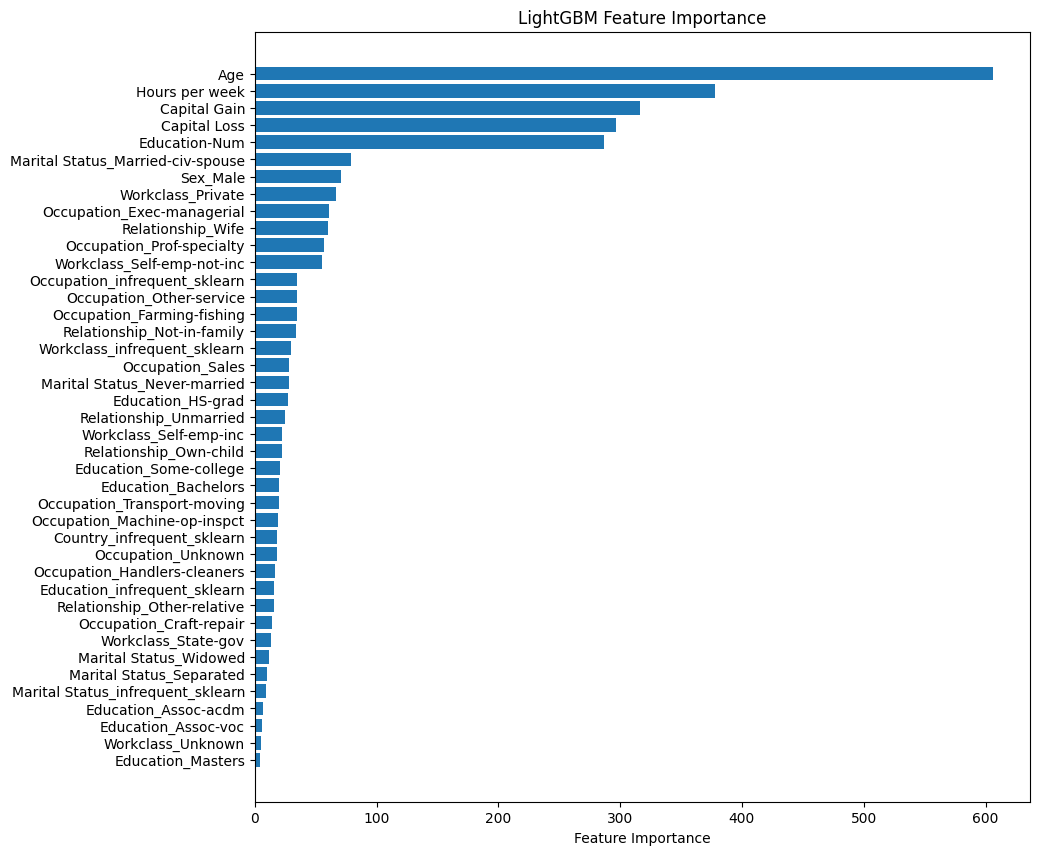

In [63]:
# Extract features importance values
feature_importance = optimized_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort the values
sorted_idx = feature_importance.argsort()

# Create a figure
plt.figure(figsize=(10, 10))

# Plot bars
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])

# Add x-axis label and title
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importance')

plt.show()

### Task 15: Compute and Visualize SHAP Values

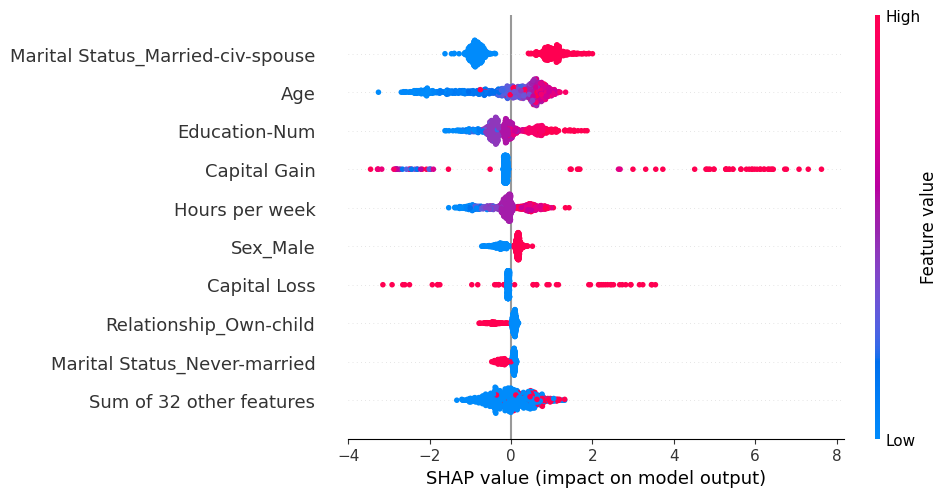

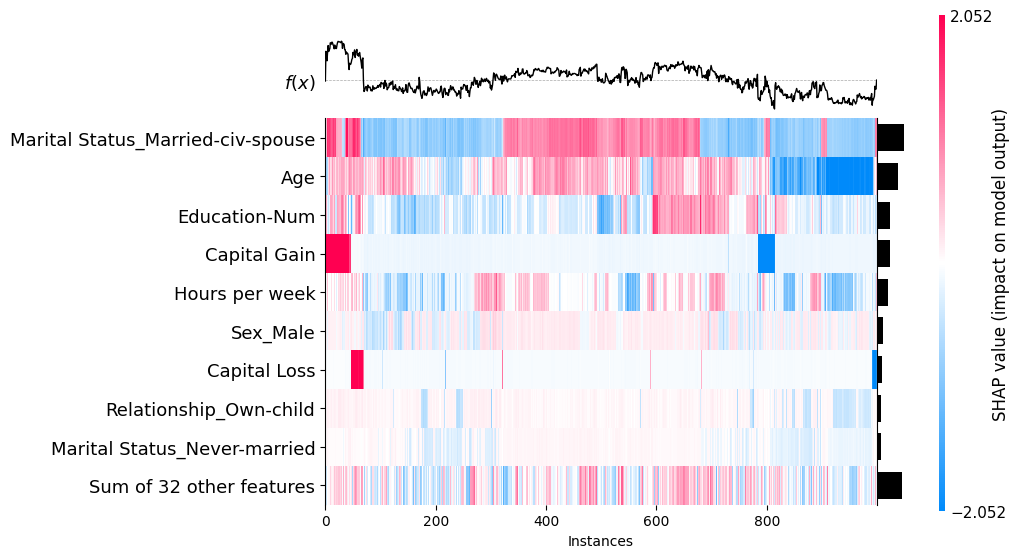

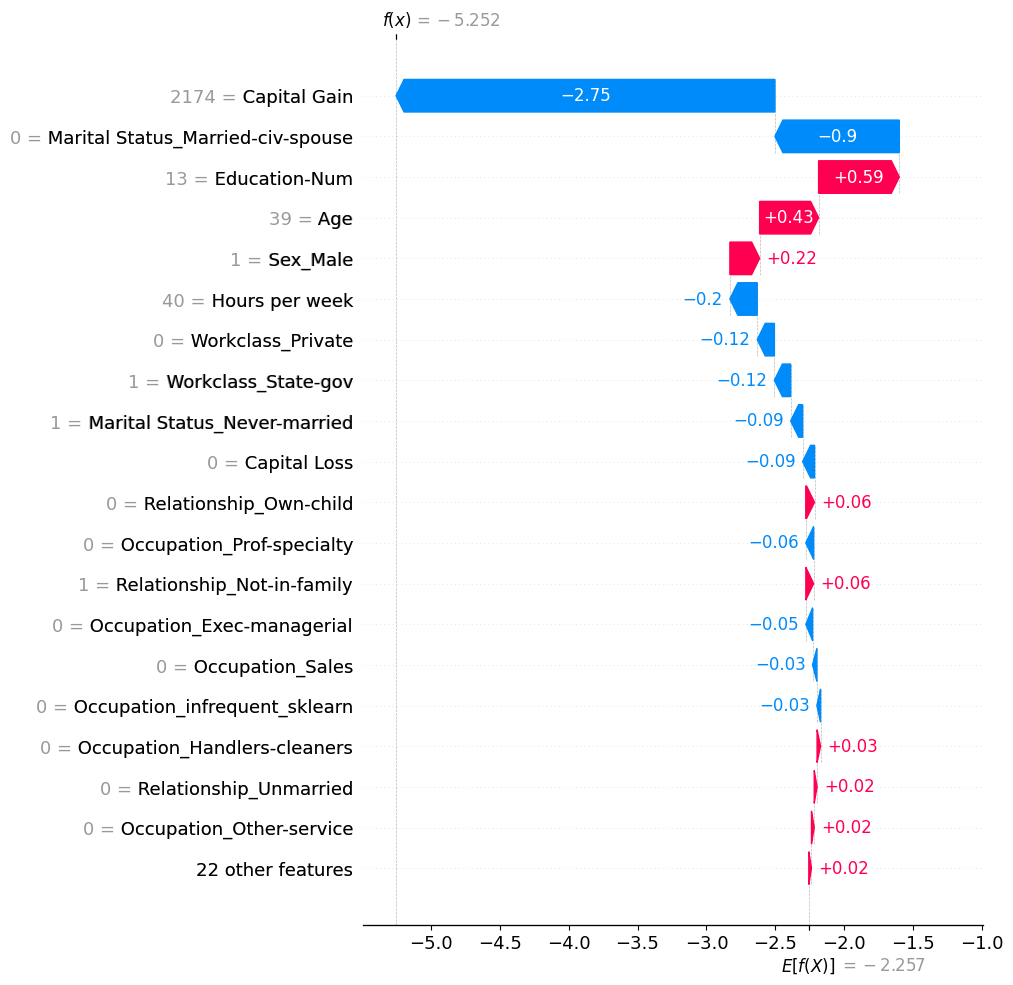

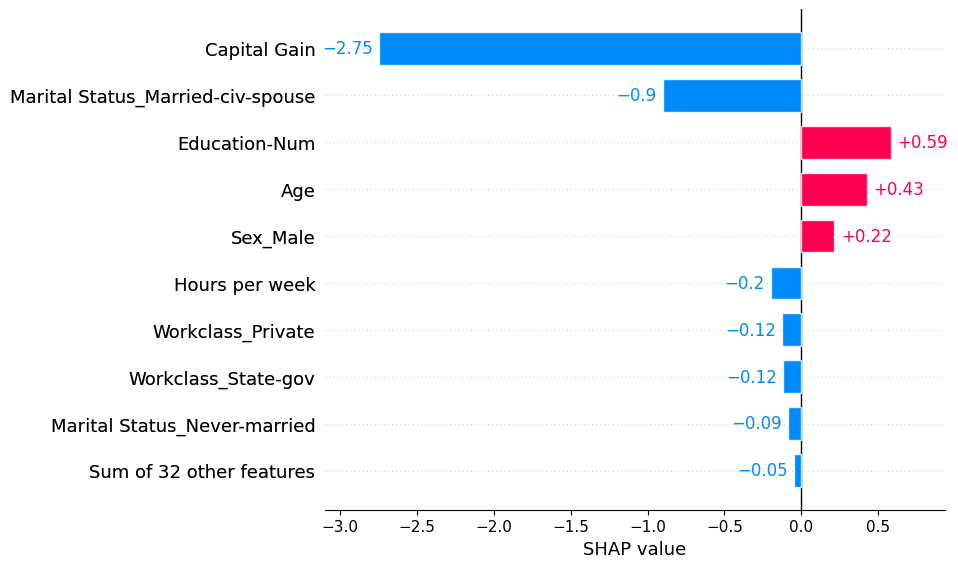

In [65]:
import shap

# Compute SHAP values
explainer = shap.Explainer(optimized_model, X)
shap_values = explainer(X[:1000])

shap.plots.beeswarm(shap_values)
shap.plots.heatmap(shap_values)

shap.plots.waterfall(shap_values[0], max_display=20)
shap.plots.bar(shap_values[0])